# Library

In [1]:
from Module.Global_variable import os, time, torch, np, pd, plt
from Module.utils.Convenience_Function import save_pickle, time_checker
import Module.process1.preparatory_items as p1pi
from Module.process1.index_dictionary_maker import get_index_dictionary
from Module.process1.pipeLine import model_pipeline

# Global Variable

In [2]:
# Process 시작 전 정의 사항
#####################################################################################
_MAKE_NEW_DIRECTORY = False    # directory 생성
_MAKE_NEW_INDEX_DICT = False   # Index dictionary를 새로 생성할 것인지
# Log를 출력할 것인지
_VERBOSE = True
# Train 중 log를 저장할 것인지
_SAVE_TRAIN_LOG = True
# Time iteration log를 저장할 것인지
_SAVE_ITER_LOG = True
# 사용할 GPU 번호
_GPU_NUMBER = 2
torch.cuda.set_device(_GPU_NUMBER)   # set basic gpu
# torch._dynamo 캐시 한계치 조정
torch._dynamo.config.cache_size_limit = 64   # Default
# 모델 저장 여부
_MODEL_SAVE_BOOL = True
#####################################################################################


# 학습 간 전역 변수 설정
#####################################################################################
# process 기초 디렉터리 생성
p1pi.make_process_start_dir(makes_new=_MAKE_NEW_DIRECTORY)
# index dictionary with Data Loader
_IDX_DICT = get_index_dictionary(process_boolean=_MAKE_NEW_INDEX_DICT).process()
#####################################################################################


# Model 학습 관련 변수 설정
#####################################################################################
_PROCESS_SET_DICT = p1pi.get_process_set_dict(
    model_save=_MODEL_SAVE_BOOL,        # 모델 저장 여부
    save_iter_time_log=_SAVE_ITER_LOG,  # iteration의 time log 저장 여부
    save_train_log=_SAVE_TRAIN_LOG,     # 학습 과정에사 발생하는 주요 issue의 저장 여부
    verbose=_VERBOSE
)
_MODEL_SET_DICT = p1pi.get_model_set_dict(
    model_key="retinaNet",
    cnn_key="resnet50_v2",
    optimizer_key="AdamW"
)
_HYPER_PARAMS_DICT = p1pi.get_HP_set_dict(
    learing_rate=0.00001, weight_decay=0.005,
    T_0=20, T_mult=2, eta_min=0.00000001,
    CS_threshold=0.5,   # 모델의 추론 결과에 대하여 Confidence socre의 threshold
    iou_threshold=0.3   # NMS에 적용될 IoU의 threshold
)
#####################################################################################

# Process

In [3]:
for k in range(_PROCESS_SET_DICT["k_size"]):
    
    # Model 학습을 위한 Instance 생성
    MTnE_Ob = model_pipeline(
        p_set_dict=_PROCESS_SET_DICT, m_set_dict=_MODEL_SET_DICT, hp_dict=_HYPER_PARAMS_DICT,
        idx_dict=_IDX_DICT, gpu_num=_GPU_NUMBER
    )
    # DataLoader와 predict에 사용될 idx_dict(pred_idx_dict)를 정의한다.
    MTnE_Ob.define_k_Loader_and_idx_dict(k)
    # Model 정의
    MTnE_Ob.import_model()
    # Optimizer(Scheduler, Scaler) 정의
    MTnE_Ob.import_optimizer_and_scheduler()
    # 주요 Instance 생성
    MTnE_Ob.make_important_Instance(k)
    
    MTnE_Ob.Iter_log_Ins.make_log_file()      # 해당 Dataset에 대한 신규 Log file 생성
    MTnE_Ob.make_train_log_path_and_file(k)   # 해당 train에 대한 train_log의 경로 및 파일 생성
    MTnE_Ob.make_model_save_path(k)           # model 저장 경로 생성
    
    # 모델의 학습 및 추론 실시.
    loss_dict, score_dict, predict_dict = MTnE_Ob.model_train_and_evaluate()
    
    break

Epochs:  1/200 [train][=============================================================] (1114/1114) [time] 0:06:49.59 total loss: 0.2117 [Loss ]  | classification 0.1189 | bbox_regression 0.0928
Epochs:  1/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:15.44 total loss: 0.0865 [Score]  | AP(AP@[.50:.05:.95]) 0.5155 | AP50 0.7473 | AP75 0.6193 | precision 0.9800 | recall 0.7509 | f1_score 0.8502
save check point: [before]: inf / [now]: 0.086471 - Saving model...
Epochs:  2/200 [train][=============================================================] (1114/1114) [time] 0:07:08.90 total loss: 0.1219 [Loss ]  | classification 0.0488 | bbox_regression 0.0731
Epochs:  2/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:15.02 total loss: 0.0722 [Score]  | AP(AP@[.50:.05:.95]) 0.6109 | AP50 0.8520 | AP75 0.7276 | precision 0.9940 | recall 0.8536 | f1_score 0.9185
save check point: [before]: 0.086471

Epochs: 18/200 [train][=============================================================] (1114/1114) [time] 0:07:29.76 total loss: 0.0703 [Loss ]  | classification 0.0194 | bbox_regression 0.0509
Epochs: 18/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:15.35 total loss: 0.0488 [Score]  | AP(AP@[.50:.05:.95]) 0.7411 | AP50 0.9302 | AP75 0.8976 | precision 0.9970 | recall 0.9312 | f1_score 0.9629
Epochs: 19/200 [train][=============================================================] (1114/1114) [time] 0:07:14.68 total loss: 0.0727 [Loss ]  | classification 0.0211 | bbox_regression 0.0517
Epochs: 19/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:16.26 total loss: 0.0566 [Score]  | AP(AP@[.50:.05:.95]) 0.7255 | AP50 0.9193 | AP75 0.8833 | precision 0.9933 | recall 0.9204 | f1_score 0.9554
Epochs: 20/200 [train][=============================================================] (1114/1114) [time]

Epochs: 35/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:16.52 total loss: 0.0454 [Score]  | AP(AP@[.50:.05:.95]) 0.7519 | AP50 0.9345 | AP75 0.9029 | precision 0.9982 | recall 0.9351 | f1_score 0.9656
Epochs: 36/200 [train][=============================================================] (1114/1114) [time] 0:07:19.88 total loss: 0.0588 [Loss ]  | classification 0.0145 | bbox_regression 0.0443
Epochs: 36/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:15.55 total loss: 0.0452 [Score]  | AP(AP@[.50:.05:.95]) 0.7495 | AP50 0.9322 | AP75 0.9014 | precision 0.9982 | recall 0.9328 | f1_score 0.9644
Epochs: 37/200 [train][=============================================================] (1114/1114) [time] 0:07:16.66 total loss: 0.0618 [Loss ]  | classification 0.0155 | bbox_regression 0.0463
Epochs: 37/200 [valid][=============================================================] ( 125/ 125) [time]

Epochs: 53/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:15.34 total loss: 0.0468 [Score]  | AP(AP@[.50:.05:.95]) 0.7598 | AP50 0.9412 | AP75 0.9069 | precision 0.9976 | recall 0.9419 | f1_score 0.9690
Epochs: 54/200 [train][=============================================================] (1114/1114) [time] 0:07:11.82 total loss: 0.0562 [Loss ]  | classification 0.0138 | bbox_regression 0.0424
Epochs: 54/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:16.55 total loss: 0.0495 [Score]  | AP(AP@[.50:.05:.95]) 0.7619 | AP50 0.9418 | AP75 0.9099 | precision 0.9982 | recall 0.9425 | f1_score 0.9695
Epochs: 55/200 [train][=============================================================] (1114/1114) [time] 0:07:10.49 total loss: 0.0563 [Loss ]  | classification 0.0135 | bbox_regression 0.0427
Epochs: 55/200 [valid][=============================================================] ( 125/ 125) [time]

Epochs: 72/200 [train][=============================================================] (1114/1114) [time] 0:07:03.10 total loss: 0.0519 [Loss ]  | classification 0.0110 | bbox_regression 0.0409
Epochs: 72/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:16.41 total loss: 0.0498 [Score]  | AP(AP@[.50:.05:.95]) 0.7690 | AP50 0.9474 | AP75 0.9154 | precision 0.9976 | recall 0.9482 | f1_score 0.9723
Epochs: 73/200 [train][=============================================================] (1114/1114) [time] 0:07:28.28 total loss: 0.0527 [Loss ]  | classification 0.0112 | bbox_regression 0.0416
Epochs: 73/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:16.75 total loss: 0.0498 [Score]  | AP(AP@[.50:.05:.95]) 0.7681 | AP50 0.9468 | AP75 0.9143 | precision 0.9976 | recall 0.9476 | f1_score 0.9720
Epochs: 74/200 [train][=============================================================] (1114/1114) [time]

# Result

In [4]:
score_dict['test']

{'AP(AP@[.50:.05:.95])': 0.7520287385306503,
 'AP50': 0.92486890580577,
 'AP75': 0.899389106874595,
 'precision': 0.9987623762376238,
 'recall': 0.9252465030956203,
 'f1_score': 0.9605999285799309}

In [5]:
from Module.process1.model_predict_checker import model_predict_checker

In [6]:
Check0_Ins = model_predict_checker(predict_dict=predict_dict, k=0, idx_dict=_IDX_DICT)
over_pred_df, under_pred_df, diff_pred_df, good_id_df = Check0_Ins.make_basic_value()

1. 추론에 사용된 전체 이미지의 갯수: 2472
--------------------------------------------------------------------------------
1-1. GT를 가지고 있는 이미지의 갯수: 820(0.332)
1-2. GT를 가지고 있지 않은 이미지의 갯수: 1652(0.668)


2. 모델의 추론 능력
--------------------------------------------------------------------------------
2-1. 모델이 GT를 찾지 못한 경우: 0
2-2. 모델이 GT가 없는 대상을 과하게 찾은 경우: 0
2-3. 총 GT의 크기 = 4359
2-3. 모델이 찾지 못한 GT의 크기 = 321(0.074)
2-4. 모델이 과도하게 찾은 GT의 크기 = 2


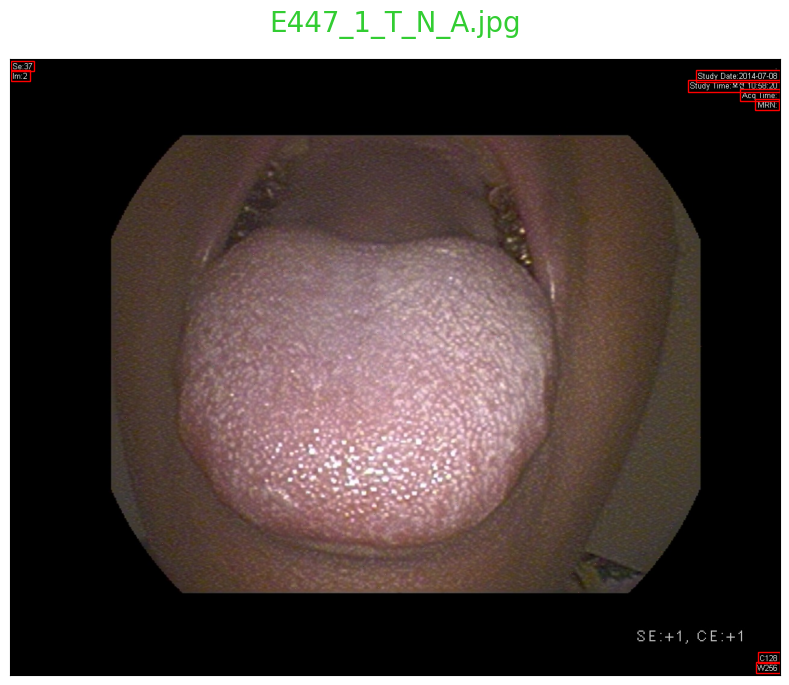

In [7]:
Check0_Ins.draw_predict_image(img_id=11196)